# Bivariate Analysis and Visualization with Titanic Dataset

Author: Aya Tamura

Date: August 25, 2024

## Project Overview

This project explores methods for analyzing and visualizing the relationship between two variables using the Titanic dataset. 

The choice of visualization techniques and statistical tests is tailored to the data types involved, demonstrating the varying approaches required for different combinations of categorical and continuous variables.

In [140]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
# Load data
df = pd.read_excel('/Users/ayatamura/Desktop/Learning/LinkedIn Learning/Ex_Files_Data_Science_Predictive_Modeling/Exercise Files/Originals/Titanic/Titanic.xls')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Partition
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Train
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Train
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Train
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Train


In [142]:
# Get 'Train' data only
df = df[df['Partition'] == 'Train']

In [143]:
# Convert 'Survived' as string to ensure the data type is categorical
df['Survived'] = df['Survived'].astype(int)
df['Survived'] = df['Survived'].astype(str)

In [144]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Partition    891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 97.5+ KB


In [145]:
# Display the dataframe 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Partition
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Train


## Question 1: Is There a Relationship Between Passenger Survival and Sex?

To investigate the relationship between survival and sex, we recognize that both variables are categorical. Therefore, we will visualize the data using a bar chart and assess the association with a Chi-Square test.

In [146]:
# Check the unique values in 'Survived' and 'sex'
print(df['Survived'].unique())
print(df['Sex'].unique())

['0' '1']
['male' 'female']


In [147]:
# Create a contingency table that shows the frequency distribution of the variables
contingency_table = pd.crosstab(df['Survived'], df['Sex'])
print(contingency_table)

Sex       female  male
Survived              
0             81   468
1            233   109


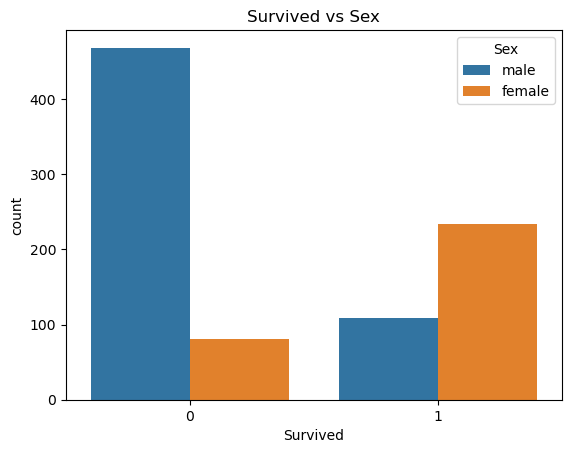

In [148]:
# Visualise the relationship
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survived vs Sex')
plt.show()

The crosstab and bar charts reveal that more women survived compared to men. To determine if this observed difference is statistically significant, we will perform a Chi-Square test.

In [149]:
# Run Chi-Square test of independence to determine if there is a significant relationship between two categorical variables
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, ttest_ind

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58


## Result for Question 1

The Chi-Square analysis indicates that we can reject the null hypothesis, concluding that there is a significant association between the Survived and Sex variables. 

This suggests that survival rates varied significantly between male and female passengers.


----


## Question 2: Is There a Relationship Between Passenger Survival and Ticket Fare?

To explore the relationship between survival and ticket fare, we acknowledge that one variable is categorical while the other is continuous. 

Therefore, we will visualize the data using a box plot and determine the association with either a t-test or a Mann-Whitney U test, depending on the distribution pattern of the fare data.

In [150]:
# Check basic statistics for 'Fare'
print(df['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


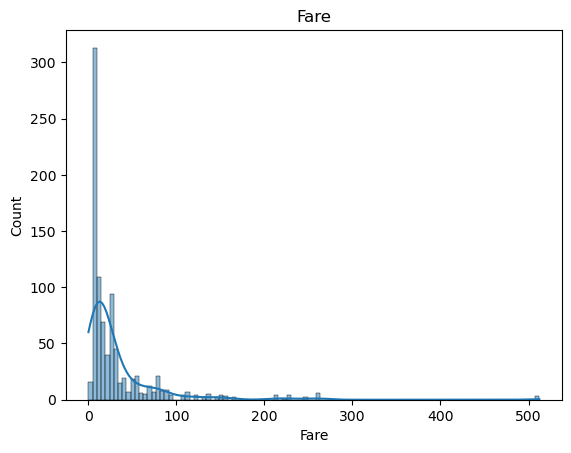

In [151]:
# Visualise the distribution of 'Fare'
sns.histplot(df['Fare'], kde=True)
plt.title('Fare')
plt.show()

The histogram shows that the fare data is highly right-skewed. 

Given this non-normal distribution, it is more appropriate to avoid using a t-test and instead perform a non-parametric test, such as the Mann-Whitney U test, for the statistical analysis.

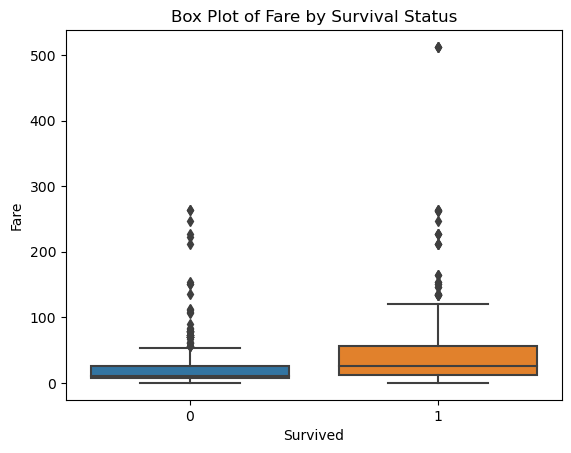

In [152]:
# Visualise the relationship with a box plot
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box Plot of Fare by Survival Status')
plt.show()

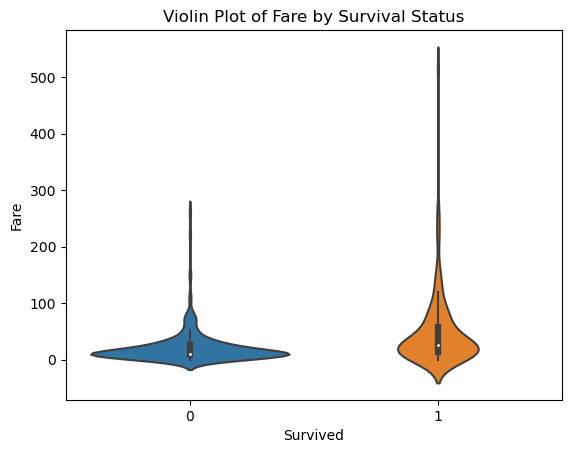

In [153]:
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Violin Plot of Fare by Survival Status')
plt.show()

The box plot and violin chart reveal that passengers who survived tended to pay slightly higher fares compared to those who did not survive. 

To determine whether this observed difference is statistically significant, we will perform a Mann-Whitney U test.

In [154]:
#  Compare the Means of Fare Between Survival Groups
print(df.groupby('Survived')['Fare'].describe())

          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [155]:
# Since the distribution of Fare is highly skewed, we will use the Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Separate fares into two groups: survived vs not survived
fare_survived = df[df['Survived'] == '1']['Fare']
fare_not_survived = df[df['Survived'] == '0']['Fare']

u_stat, p_val = mannwhitneyu(fare_survived, fare_not_survived)
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_val}")

U-statistic: 129951.5
P-value: 4.553477179250237e-22


## Result for Question 2

The Mann-Whitney U analysis indicates that we can reject the null hypothesis, concluding that there is a significant association between the Survived and Fare variables. This suggests that survival rates differed significantly based on the ticket fare paid by passengers.

---

## Question 3: Is There a Relationship Between Passenger Survival and the Number of Parents and Children?

To explore the relationship between survival and the number of parents and children aboard (represented by the Parch variable), we recognize that Survived is categorical while Parch is numerical. However, the Parch variable can also be treated as ordinal. Therefore, we will visualize the data using both bar charts and box plots to determine the most appropriate way to treat the variable. Based on this, we will then conduct a statistical test such as a t-test, a Mann-Whitney U test, or Kruskal-Wallis H test depending on the data distribution.

In [156]:
# Describe Parchi
print(df['Parch'].describe())

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


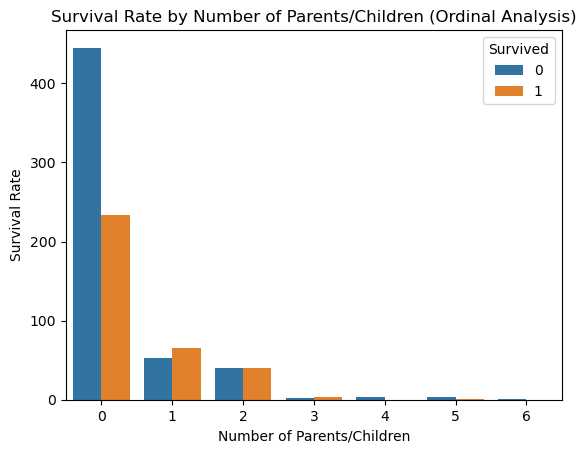

In [157]:
# Bar Plot for ordinal analysis
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children (Ordinal Analysis)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()

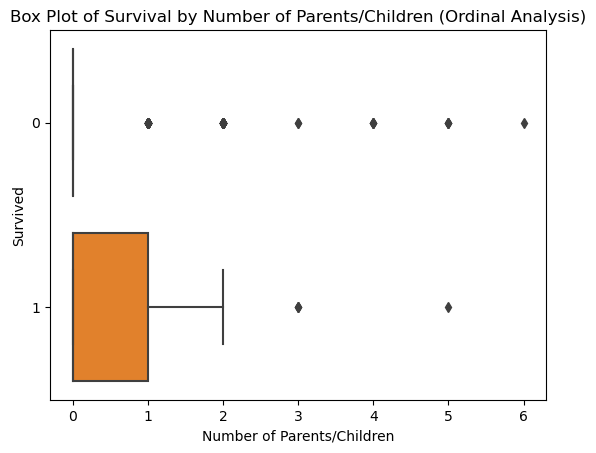

In [158]:
# Box Plot for continuous analysis
sns.boxplot(x='Parch', y='Survived', data=df)
plt.title('Box Plot of Survival by Number of Parents/Children (Ordinal Analysis)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survived')
plt.show()

Based on the data visualizations, including the count plot and box plot, no clear patterns are observed when treating Parch as a continuous variable. 

Consequently, it is more appropriate to treat Parch as an ordinal variable for the analysis in this case. 

For ordinal data, we can use non-parametric tests like the Kruskal-Wallis H test to see if there are significant differences in survival rates across different levels of Parch.

In [159]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test
groups = [df[df['Parch'] == x]['Survived'] for x in sorted(df['Parch'].unique())]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H statistic: {h_stat}")
print(f"P-value: {p_val}")

Kruskal-Wallis H statistic: 27.894441990583733
P-value: 9.836244490848963e-05


## Result for Question 3

The Kruskal-Wallis test results indicate that we can reject the null hypothesis, concluding that there is a significant association between the Survived and Parch variables. This suggests that survival rates varied significantly based on the number of parents and children aboard.

---

## Summary

This notebook explores the relationships between passenger survival and various variables in the Titanic dataset. The analyses conducted are as follows:

1. **Survival and Sex:**

    Objective: Examine the relationship between survival (Survived) and sex (Sex).

    Method: A bar chart and Chi-Square test were used to analyze the association between these categorical variables.

    Result: The Chi-Square test indicated a significant association between survival and sex, suggesting that survival rates were notably different between male and female passengers.

2. **Survival and Fare:**

    Objective: Investigate the relationship between survival (Survived) and ticket fare (Fare).

    Method: Due to the right-skewed distribution of Fare, non-parametric methods were employed. Visualization was performed using box plots and violin plots, and statistical significance was tested using the Mann-Whitney U test.

    Result: The Mann-Whitney U test revealed a significant association between survival and fare, indicating that passengers who survived generally paid higher fares.

3. **Survival and Number of Parents/Children:**

    Objective: Analyze the relationship between survival (Survived) and the number of parents/children aboard (Parch).

    Method: Parch was examined both as an ordinal and continuous variable. Visualization was conducted using count plots and box plots, while the Kruskal-Wallis H test was applied for ordinal analysis.

    Result: The Kruskal-Wallis test indicated a significant association between survival and Parch, suggesting that survival rates varied based on the number of parents and children.

## Potential Analysis of Continuous vs. Continuous Variables
While this notebook does not include an analysis of continuous vs. continuous variables due to the current dataset's limitations, here's how you could approach such an analysis if suitable data were available:

Objective: To examine the relationship between two continuous variables.

Method:

1. Visualization: Use scatter plots to visually assess the relationship. A regression line can be added to understand trends.

2. Correlation Analysis: Compute Pearson's correlation coefficient to quantify the strength and direction of the linear relationship between the two continuous variables.

3. Regression Analysis: Apply linear regression to model the relationship and determine if one continuous variable predicts another. Evaluate the model's fit and significance through metrics such as R-squared and p-values.


In this notebook, we focused on categorical and continuous variable relationships due to the available data, but these methods can be adapted for continuous vs. continuous analyses in other datasets.

**END**